In [1]:
# MLP(multi-layer perceptron)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
in_size = 28 * 28
out_size = 10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.4308 - accuracy: 0.8628 - val_loss: 0.1179 - val_accuracy: 0.9634
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1072 - accuracy: 0.9682 - val_loss: 0.0830 - val_accuracy: 0.9741
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0775 - val_accuracy: 0.9777
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0717 - val_accuracy: 0.9807
Epoch 5/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0784 - val_accuracy: 0.9796
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0835 - val_accuracy: 0.9812
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0735 - val_accuracy: 0.9822

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9856
正解率= 0.9855999946594238 loss= 0.21377870440483093


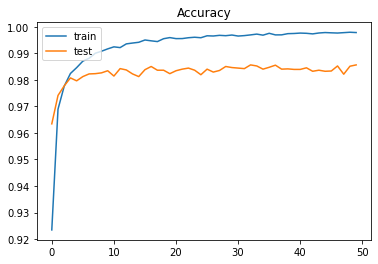

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

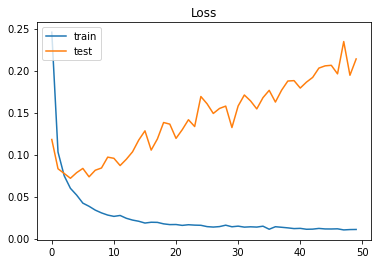

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()